In [47]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
data_lacentrale=pd.read_csv('lacentrale_clean.csv', sep=',', encoding='utf8')

In [5]:
print('Les colonnes de data sont',data_lacentrale.columns)

Les colonnes de data sont Index(['nom', 'marque', 'modele', 'categorie', 'Emission_CO2', 'kilometrage',
       'energie', 'boite_de_vitesse', 'couleur', 'nombre_portes',
       'nombre_place', 'mise_circulation', 'reference_annonce', 'conso_mixte',
       'Puissance_fiscale', 'Puissance_din', 'Crit_Air', 'prix'],
      dtype='object')


In [15]:
data_lacentrale=pd.read_csv('lacentrale_clean.csv')
data_lacentrale.head(10)

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
0,PEUGEOT 5008,Réf. annonce : W101742031,PEUGEOT,5008,Monospace,B,51040,Diesel,mécanique,blanc nacre,5,7,16/03/2017,4.0,8,150,2,20180
1,PEUGEOT 2008,Réf. pro : 81 | Réf. annonce : W101736655,PEUGEOT,2008,"4x4,SUV&Crossover",A,59822,Diesel,automatique,gris foncé metal,5,5,18/02/2018,3.0,5,99,2,16820
2,PEUGEOT 2008,Réf. pro : 1652 | Réf. annonce : E105694390,PEUGEOT,2008,"4x4,SUV&Crossover",B,19864,Essence,mécanique,gris foncé,5,5,10/08/2019,4.8,7,130,1,18340
3,PEUGEOT 508 (2E GENERATION),Réf. pro : 1814 | Réf. annonce : E106119672,PEUGEOT,508 (2E GENERATION),Berline,B,32103,Diesel,automatique,gris foncé,5,5,07/06/2020,4.5,8,160,2,34200
4,PEUGEOT 3008 (2E GENERATION),Réf. pro : 63 | Réf. annonce : W101728119,PEUGEOT,3008 (2E GENERATION),"4x4,SUV&Crossover",B,11,Diesel,automatique,foncé metal,5,5,22/12/2021,4.0,6,130,2,34520
5,PEUGEOT 308 (2E GENERATION),Réf. pro : 79 | Réf. annonce : W101733700,PEUGEOT,308 (2E GENERATION),Berline,A,145197,Diesel,mécanique,gris clair metal,5,5,13/01/2017,3.0,5,99,2,12180
6,PEUGEOT 308 (2E GENERATION) SW,Réf. pro : 86 | Réf. annonce : W101739444,PEUGEOT,308 (2E GENERATION) SW,Break,A,97608,Diesel,mécanique,blanc metal,5,5,14/01/2018,3.0,5,99,2,14440
7,PEUGEOT 208,Réf. pro : 54 | Réf. annonce : W101726995,PEUGEOT,208,Citadine,A,69888,Diesel,mécanique,blanc metal,5,5,11/11/2018,3.0,5,99,2,12740
8,PEUGEOT 208,Réf. pro : 1813 | Réf. annonce : E106139833,PEUGEOT,208,Citadine,A,80989,Diesel,mécanique,noir,5,5,10/12/2017,3.5,5,100,2,12480
9,PEUGEOT EXPERT 3 FOURGON,Réf. pro : 33 | Réf. annonce : W101725570,PEUGEOT,EXPERT 3 FOURGON,"Fourgon(moinsde3,5t)",C,39583,Diesel,mécanique,blanc verni,4,3,10/05/2019,5.0,7,122,2,21480


In [16]:
print(data_lacentrale.shape[0],'lignes',data_lacentrale.shape[1],'colonnes')

2400 lignes 18 colonnes


In [17]:
data_lacentrale.isnull().sum()

nom                  0
ref                  0
marque               0
modele               0
categorie            0
co2                  0
nb_km                0
carburant            0
boite_vitesse        0
couleur              0
nb_portes            0
nb_places            0
mise_circulation     0
conso_mixte         50
p_fiscale            0
p_din                0
critair              0
prix                 0
dtype: int64

In [18]:
data_lacentrale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 18 columns):
nom                 2400 non-null object
ref                 2400 non-null object
marque              2400 non-null object
modele              2400 non-null object
categorie           2400 non-null object
co2                 2400 non-null object
nb_km               2400 non-null int64
carburant           2400 non-null object
boite_vitesse       2400 non-null object
couleur             2400 non-null object
nb_portes           2400 non-null int64
nb_places           2400 non-null int64
mise_circulation    2400 non-null object
conso_mixte         2350 non-null float64
p_fiscale           2400 non-null int64
p_din               2400 non-null int64
critair             2400 non-null int64
prix                2400 non-null int64
dtypes: float64(1), int64(7), object(10)
memory usage: 337.6+ KB


In [19]:
data_lacentrale.describe(include='all')

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
count,2400,2400,2400,2400,2400,2400,2400.000000,2400,2400,2400,2400.000000,2400.000000,2400,2350.000000,2400.000000,2400.000000,2400.000000,2400.000000
unique,25,48,3,25,7,5,NaN,3,2,21,NaN,NaN,182,NaN,NaN,NaN,NaN,NaN
top,CITROEN C3 (3E GENERATION),Réf. pro : 37 | Réf. annonce : W101725663,CITROEN,C3 (3E GENERATION),Citadine,B,NaN,Diesel,mécanique,noir metal,NaN,NaN,17/09/2017,NaN,NaN,NaN,NaN,NaN
freq,300,50,800,300,700,1200,NaN,2050,1700,300,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,63143.233333,NaN,NaN,NaN,4.937500,5.020833,NaN,3.838298,5.687500,113.979167,1.875000,17209.695833
std,NaN,NaN,NaN,NaN,NaN,NaN,48955.541047,NaN,NaN,NaN,0.242112,0.829067,NaN,0.747225,1.261153,28.566917,0.388722,6089.997508
min,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,4.000000,2.000000,NaN,3.000000,4.000000,75.000000,1.000000,5530.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,29754.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,3.000000,5.000000,92.250000,2.000000,12790.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,52360.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.000000,5.000000,110.000000,2.000000,15580.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,86702.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.300000,6.000000,124.000000,2.000000,19740.000000


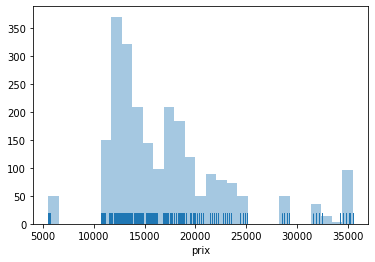

In [21]:
sns.distplot(data_lacentrale['prix'], kde=False, rug=True)

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

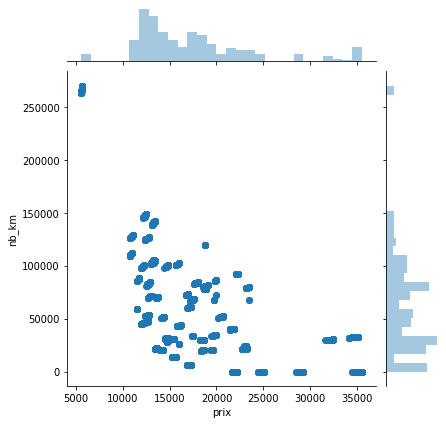

In [22]:
sns.jointplot('prix','nb_km',data_lacentrale)
plt

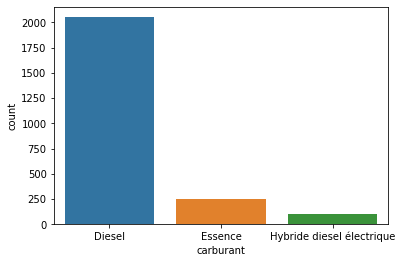

In [76]:
#plt.pie(['Diesel','Essence'],autopct='%1.1f%%')
sns.countplot('carburant',data=data_lacentrale)

(8, 8)


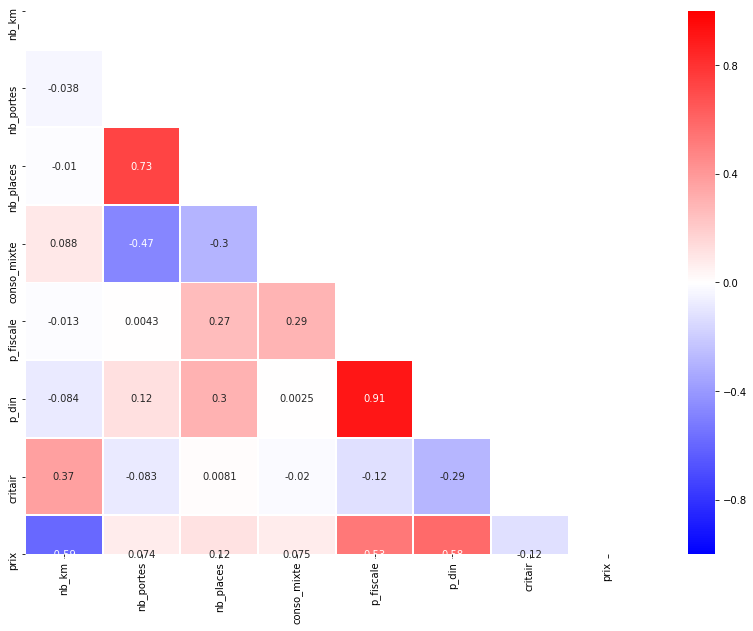

In [24]:
def plot_matrix(df, seuil):

    corr_mask = abs(df.corr()['prix']) > seuil
    high_corr = df.corr().loc[corr_mask,corr_mask]

    plt.figure(figsize=(15,10))
    sns.heatmap(high_corr, 
                annot=True, 
                cmap="bwr",
                linecolor='white', 
                linewidths='1', 
                square=True,
                center=0, 
                vmin=-1,
                vmax=1,
                mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)),
                fmt='.2g')
    plt.xticks(rotation=90)
    print(high_corr.shape)  
plot_matrix(data_lacentrale, 0)

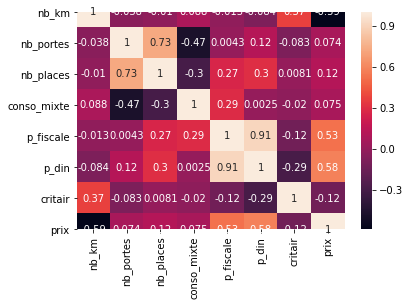

In [70]:
sns.heatmap(data_lacentrale.corr(),annot=True) #corr uniquement quantitatif
plt.show()

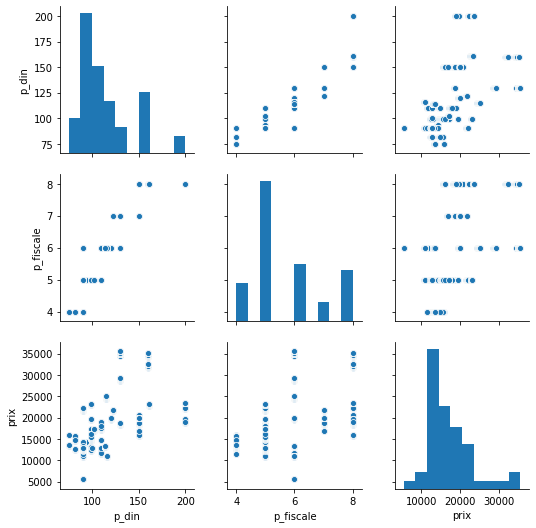

In [25]:
sns.pairplot(data_lacentrale,vars=['p_din','p_fiscale','prix'])

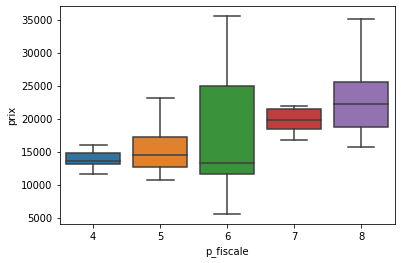

In [49]:
sns.boxplot('p_fiscale','prix',data=data_lacentrale)

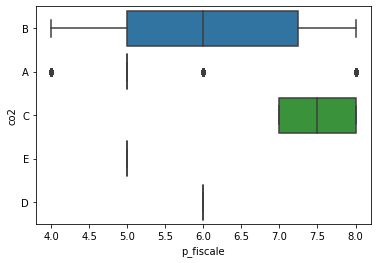

In [28]:
sns.boxplot('p_fiscale','co2',data=data_lacentrale)

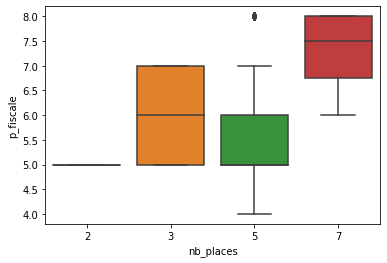

In [61]:
sns.boxplot('nb_places','p_fiscale',data=data_lacentrale)

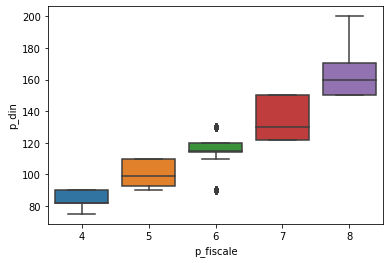

In [62]:
sns.boxplot('p_fiscale','p_din',data=data_lacentrale)

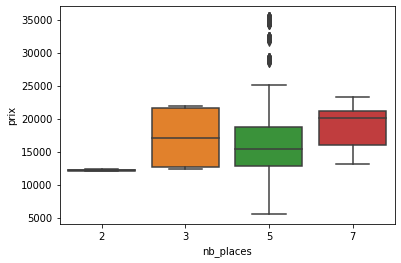

In [63]:
sns.boxplot('nb_places','prix',data=data_lacentrale)

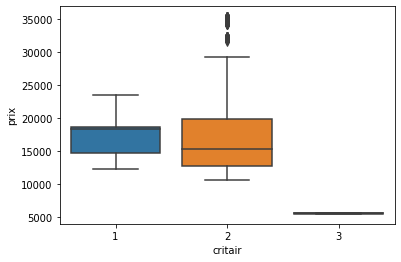

In [65]:
sns.boxplot('critair','prix',data=data_lacentrale)

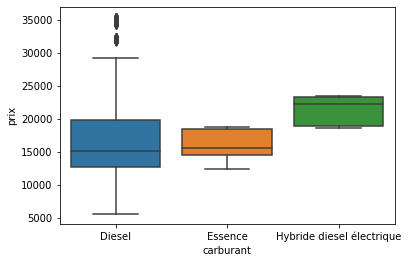

In [72]:
sns.boxplot('carburant','prix',data=data_lacentrale)

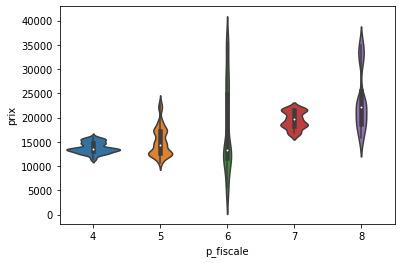

In [64]:
sns.violinplot('p_fiscale','prix',data=data_lacentrale)


## conclusion  

In [ ]:
le prix du vehicules moyens est de 17209.67 euro
le prix minimun est de 5530 euros 
l'écart type du prix d'une voitures est de 6089.997508
On peu s'apercevoir que le types de voiture la  plus repondu est la voiture diesel
Nous avons fais une matrice de coréllation est on s'apercoit 
que les variables les plus corollés :sont(p_dim,p_fiscale)
que les variables les plus corollés :sont(prix,p_fiscale)
que les variables les plus corollés :sont(prix,p_dim)
que les variables les plus corollés :sont(p_dim,nb_place)
que les variables les plus corollés :sont (critair,nb_km)
pour la boxplot(prix,nb_place)
plus il y a de places plus la voitures est cher
pour la boxplot(critair,prix)
plus  la voiture à un critair élever moins elle est cher ce  qui montre  que  plus  la  voiture est vielle  moins  elle est cher  
pour la boxplot(carburant,prix)
on peu s'apercevoir que les voitures les plus cher sont c'elle au diesel 
pour la boxplot(prix,p_fiscale)
on  peu s'apercevoir que plus la puissance fiscale est élever plus la voiture est cher  
pour la boxplot(nb_place,prix)
on  peu s'apercevoir que plus le nombre de place est grand plus la voiture est cher
pour la boxplot(pdim,p_fiscale)
on  peu s'apercevoir  que plus la  puissance  est élever  plus  la  dimension de  la voiture est élever 

## netoyages des  données 

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
#from category_encoders import OrdinalEncoder
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBRegressor
import time
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [131]:
lacentrale_clean4= pd.read_csv('lacentrale_clean4.csv')
lacentrale_clean4.head(50)

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
0,Peugeot 5008,Réf. annonce : w101742031,Peugeot,5008,Monospace,B,51040,Diesel,Manuelle,Blanc nacre,5,7,2017,4.0,8,150,2,20180
1,Peugeot 2008,Réf. pro : 81 | réf. annonce : w101736655,Peugeot,2008,Suv 4x4,A,59822,Diesel,Auto,Gris foncé metal,5,5,2018,3.0,5,99,2,16820
2,Peugeot 2008,Réf. pro : 1652 | réf. annonce : e105694390,Peugeot,2008,Suv 4x4,B,19864,Essence,Manuelle,Gris foncé,5,5,2019,4.8,7,130,1,18340
3,Peugeot 508 (2e generation),Réf. pro : 1814 | réf. annonce : e106119672,Peugeot,508 (2e generation),Berline,B,32103,Diesel,Auto,Gris foncé,5,5,2020,4.5,8,160,2,34200
4,Peugeot 3008 (2e generation),Réf. pro : 63 | réf. annonce : w101728119,Peugeot,3008 (2e generation),Suv 4x4,B,11,Diesel,Auto,Foncé metal,5,5,2021,4.0,6,130,2,34520
5,Peugeot 308 (2e generation),Réf. pro : 79 | réf. annonce : w101733700,Peugeot,308 (2e generation),Berline,A,145197,Diesel,Manuelle,Gris clair metal,5,5,2017,3.0,5,99,2,12180
6,Peugeot 208,Réf. pro : 54 | réf. annonce : w101726995,Peugeot,208,Citadine,A,69888,Diesel,Manuelle,Blanc metal,5,5,2018,3.0,5,99,2,12740
7,Peugeot 208,Réf. pro : 1813 | réf. annonce : e106139833,Peugeot,208,Citadine,A,80989,Diesel,Manuelle,Noir,5,5,2017,3.5,5,100,2,12480
8,Peugeot 208,Réf. pro : 1827 | réf. annonce : e106139834,Peugeot,208,Citadine,A,82336,Diesel,Manuelle,Noir,5,5,2017,3.5,5,100,2,12580
9,Peugeot 208,Réf. pro : 1812 | réf. annonce : e106139832,Peugeot,208,Citadine,B,46209,Essence,Manuelle,Noir,5,5,2017,4.5,4,82,1,12370


In [132]:
lacentrale_clean4.isnull().sum()

nom                 0
ref                 0
marque              0
modele              0
categorie           0
co2                 0
nb_km               0
carburant           0
boite_vitesse       0
couleur             0
nb_portes           0
nb_places           0
mise_circulation    0
conso_mixte         0
p_fiscale           0
p_din               0
critair             0
prix                0
dtype: int64

In [133]:
lacentrale_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
nom                 2100 non-null object
ref                 2100 non-null object
marque              2100 non-null object
modele              2100 non-null object
categorie           2100 non-null object
co2                 2100 non-null object
nb_km               2100 non-null int64
carburant           2100 non-null object
boite_vitesse       2100 non-null object
couleur             2100 non-null object
nb_portes           2100 non-null int64
nb_places           2100 non-null int64
mise_circulation    2100 non-null int64
conso_mixte         2100 non-null float64
p_fiscale           2100 non-null int64
p_din               2100 non-null int64
critair             2100 non-null int64
prix                2100 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usage: 295.4+ KB


In [90]:
lacentrale.mise_circulation=lacentrale.mise_circulation.astype(str)
lacentrale.conso_mixte=lacentrale.conso_mixte.astype('float64')

## études  des  modeles  de  machine learning  

## regression lineaire

In [112]:
#SVR
#modele(regression['SVR'])

In [114]:
# #LR
#modele(regression['LR'])

In [ ]:
#modele(regression['RF'])

## Etudes  de la problematique 

In [150]:
## Nous allons comparer les  prix  de la  centrale  avec le  prix  du site  beke pour savoir s'il est le  plus cher  

In [151]:
y=pd.DataFrame(lacentrale_clean4,columns=["prix"])
print(y)

       prix
0     20180
1     16820
2     18340
3     34200
4     34520
...     ...
2095  19610
2096  13690
2097  17250
2098  13450
2099   5680

[2100 rows x 1 columns]


In [164]:
X=pd.DataFrame(lacentrale_clean4,columns=["prix","p_fiscale","co2","nb_km","p_din","categorie","carburant"])
X.head(15)

,prix,p_fiscale,co2,nb_km,p_din,categorie,carburant
0,20180,8,B,51040,150,Monospace,Diesel
1,16820,5,A,59822,99,Suv 4x4,Diesel
2,18340,7,B,19864,130,Suv 4x4,Essence
3,34200,8,B,32103,160,Berline,Diesel
4,34520,6,B,11,130,Suv 4x4,Diesel
5,12180,5,A,145197,99,Berline,Diesel
6,12740,5,A,69888,99,Citadine,Diesel
7,12480,5,A,80989,100,Citadine,Diesel
8,12580,5,A,82336,100,Citadine,Diesel
9,12370,4,B,46209,82,Citadine,Essence


In [155]:
data_beke=pd.read_csv('beke_processed.csv', sep=',', encoding='utf8')

In [156]:
print('Les colonnes de data sont',data_beke.columns)

Les colonnes de data sont Index(['nom', 'sous_nom', 'ref', 'marque', 'modele', 'categorie', 'co2',
       'nb_km', 'carburant', 'boite_vitesses', 'couleur', 'nb_portes',
       'nb_places', 'mise_circulation', 'conso_mixte', 'p_fiscale', 'p_din',
       'critair', 'prix'],
      dtype='object')


In [157]:
data_beke=pd.read_csv('beke_processed.csv')
data_beke.head(10)

,nom,sous_nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesses,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
0,CITROËN BERLINGO,1.6 HDI 100 CLUB CAB. APPRO.,18416764611841676461,CITROËN,BERLINGO,DIVERS,113,63432,DIESEL,MANUELLE,BLANC,5,5,2017-03-02,0.0,5,100,2,12728
1,CITROËN BERLINGO,NOUVEAU CABINE APPROFONDIE XL PURETECH 110 S&S...,20934969532093496953,CITROËN,BERLINGO,DIVERS,117,10,ESSENCE,MANUELLE,BLANC,4,5,2020-01-29,0.0,6,110,1,20228
2,CITROËN C1,VTI 72 S S FEEL,12001202195896,CITROËN,C1,CITADINE,85,7095,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11676
3,CITROËN C1,VTI 72 S S FEEL,12002352195900,CITROËN,C1,CITADINE,93,7647,ESSENCE,MANUELLE,NOIR CALDÉRA,5,4,2019-05-17,3.7,4,72,1,11676
4,CITROËN C1,VTI 72 S S FEEL,12001202195901,CITROËN,C1,CITADINE,85,9674,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11472
5,CITROËN C1,VTI 72 S S FEEL,12001202195912,CITROËN,C1,CITADINE,85,9506,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11472
6,CITROËN C1,VTI 72 S S FEEL,12001202195913,CITROËN,C1,CITADINE,85,9474,ESSENCE,MANUELLE,BLEU CALVI,5,4,2019-05-17,3.7,3,72,1,11472
7,CITROËN C3,PURETECH 110 S S EAT6 FEEL,11910023190807,CITROËN,C3,CITADINE,114,19578,ESSENCE,AUTO,ORANGE POWER,5,5,2019-03-21,0.0,6,110,1,17082
8,CITROËN C3,PURETECH 110 S S EAT6 FEEL,11910023190811,CITROËN,C3,CITADINE,114,14399,ESSENCE,AUTO,ORANGE POWER,5,5,2019-03-13,0.0,6,110,1,17592
9,CITROËN C3,PURETECH 82 S S BVM5 FEEL,12000351194105,CITROËN,C3,CITADINE,108,13751,ESSENCE,MANUELLE,GRIS PLATINIUM,5,5,2019-03-08,0.0,4,82,1,14736


In [175]:
data_beke.describe(include='all')

,nom,sous_nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesses,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
count,392,392,392,392,392,392,392.000000,392.000000,392,392,392,392.000000,392.000000,392,392.000000,392.000000,392.000000,392.000000,392.000000
unique,39,105,392,3,39,7,NaN,NaN,2,2,57,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN
top,PEUGEOT 208,1.6 BLUEHDI 100CH BVM5 ACTIVE,12002261199241,PEUGEOT,208,CITADINE,NaN,NaN,ESSENCE,MANUELLE,NOIR PERLA NERA,NaN,NaN,2019-06-24,NaN,NaN,NaN,NaN,NaN
freq,97,66,1,251,97,181,NaN,NaN,215,312,63,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,101.089286,30097.581633,NaN,NaN,NaN,4.959184,4.875000,NaN,3.357143,5.020408,105.168367,1.451531,16676.295918
std,NaN,NaN,NaN,NaN,NaN,NaN,22.444012,25142.025614,NaN,NaN,NaN,0.283145,0.604491,NaN,1.830755,1.586255,25.705239,0.498281,5504.024385
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,0.000000,3.000000,68.000000,1.000000,7688.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,9342.750000,NaN,NaN,NaN,5.000000,5.000000,NaN,3.200000,4.000000,82.000000,1.000000,13180.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,104.000000,25422.500000,NaN,NaN,NaN,5.000000,5.000000,NaN,3.600000,5.000000,100.000000,1.000000,14685.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,110.000000,46290.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.700000,6.000000,120.000000,2.000000,19326.000000


In [184]:
data_lacentrale.describe(include='all')

,nom,ref,marque,modele,categorie,co2,nb_km,carburant,boite_vitesse,couleur,nb_portes,nb_places,mise_circulation,conso_mixte,p_fiscale,p_din,critair,prix
count,2400,2400,2400,2400,2400,2400,2400.000000,2400,2400,2400,2400.000000,2400.000000,2400,2350.000000,2400.000000,2400.000000,2400.000000,2400.000000
unique,25,48,3,25,7,5,NaN,3,2,21,NaN,NaN,182,NaN,NaN,NaN,NaN,NaN
top,CITROEN C3 (3E GENERATION),Réf. pro : 37 | Réf. annonce : W101725663,CITROEN,C3 (3E GENERATION),Citadine,B,NaN,Diesel,mécanique,noir metal,NaN,NaN,17/09/2017,NaN,NaN,NaN,NaN,NaN
freq,300,50,800,300,700,1200,NaN,2050,1700,300,NaN,NaN,48,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,63143.233333,NaN,NaN,NaN,4.937500,5.020833,NaN,3.838298,5.687500,113.979167,1.875000,17209.695833
std,NaN,NaN,NaN,NaN,NaN,NaN,48955.541047,NaN,NaN,NaN,0.242112,0.829067,NaN,0.747225,1.261153,28.566917,0.388722,6089.997508
min,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,4.000000,2.000000,NaN,3.000000,4.000000,75.000000,1.000000,5530.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,29754.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,3.000000,5.000000,92.250000,2.000000,12790.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,52360.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.000000,5.000000,110.000000,2.000000,15580.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,86702.000000,NaN,NaN,NaN,5.000000,5.000000,NaN,4.300000,6.000000,124.000000,2.000000,19740.000000


In [186]:
print("prix voiture moyenne pour beke =16676.295918")
print("prix voiture max pour beke =41728.0")
print("prix voiture min pour beke =7688")
print("prix voiture écart  type  5504.024")
print("---")
print("prix voiture moyenne pour lacentrale 17209.695833")
print("prix voiture max pour lacentrale =41728.0")
print("prix voiture min pour lacentrale =5530")
print("prix voiture écart type lcentrale=35490.00")

prix voiture moyenne pour beke =16676.295918
prix voiture max pour beke =41728.0
prix voiture min pour beke =7688
prix voiture écart  type  5504.024
---
prix voiture moyenne pour lacentrale 17209.695833
prix voiture max pour lacentrale =41728.0
prix voiture min pour lacentrale =5530
prix voiture écart type lcentrale=35490.00


In [212]:
moyenne_beke=16676.295918
moyenne_lacentrale=17209.695833
max_beke =41728.0
max_lacentrale =35490.0
min_lacentrale=5530
min_beke=7688
ecartmoyen=moyenne_lacentrale-moyenne_beke
print("ecartmoyen",ecartmoyen)
ecartmax=max_beke-max_lacentrale
print("ecartmax=",ecartmax)
ecartmin=min_beke-min_lacentrale
print("ecartmin=",ecartmin)


ecartmoyen 533.3999150000018
ecartmax= 6238.0
ecartmin= 2158


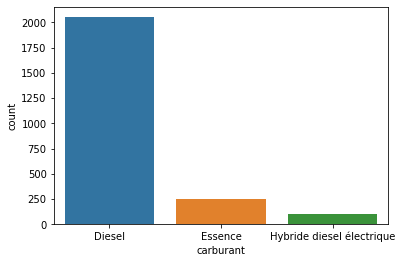

In [171]:
#plt.pie(['Diesel','Essence'],autopct='%1.1f%%

sns.countplot('carburant',data=data_lacentrale)

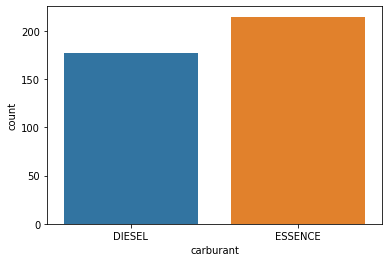

In [176]:
#plt.pie(['Diesel','Essence'],autopct='%1.1f%%')
sns.countplot('carburant',data=data_beke)

In [160]:
ypredit=pd.DataFrame(data_beke,columns=["prix"])
print(ypredit)

      prix
0    12728
1    20228
2    11676
3    11676
4    11472
..     ...
387  27728
388  40538
389  11928
390  11928
391  11728

[392 rows x 1 columns]


In [219]:
lacentrale.mise_circulation=lacentrale.mise_circulation.astype(str)
lacentrale.conso_mixte=lacentrale.conso_mixte.astype('float64')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression             # To construct the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # encode names to ints
from sklearn.model_selection import train_test_split          # To split datasets
from sklearn.metrics import mean_squared_error, r2_score      # Evaluation methods
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [252]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline